**About Dataset**

Dataset: Google Ads Campaign Data

**Source:** [Kaggle - Google Ads Campaign Data](https://www.kaggle.com/datasets/nayakganesh007/google-ads-sales-dataset)

**Overview**

Google Ads, previously known as Google AdWords, is an online advertising platform that allows businesses to show ads to potential customers across Google’s network, including search results, websites, and YouTube.

This dataset contains simulated Google Ads campaign data promoting data analytics courses and services.
In this project, I will analyze campaign performance based on KPIs like Conversion Rate (CR), ROI, CTR, and more, then give recommendations and evaluation for the next campaign.

**Key Features:**

- `Clicks` 
- `Impressions`
- `Cost`
- `Leads`
- `Conversions`
- `Conversion Rate`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/google-ads-campign-data/GoogleAdsCampaignData.csv')

df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword
0,A1000,DataAnalyticsCourse,104.0,4498.0,$231.88,14.0,7.0,0.058,$1892,2024-11-16,hyderabad,desktop,learn data analytics
1,A1001,DataAnalyticsCourse,173.0,5107.0,$216.84,10.0,8.0,0.046,$1679,20-11-2024,hyderabad,mobile,data analytics course
2,A1002,Data Anlytics Corse,90.0,4544.0,$203.66,26.0,9.0,NaN,$1624,2024/11/16,hyderabad,Desktop,data analitics online
3,A1003,Data Analytcis Course,142.0,3185.0,$237.66,17.0,6.0,NaN,$1225,2024-11-26,HYDERABAD,tablet,data anaytics training
4,A1004,Data Analytics Corse,156.0,3361.0,$195.9,30.0,8.0,NaN,$1091,2024-11-22,hyderabad,desktop,online data analytic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,A3595,DataAnalyticsCourse,88.0,5344.0,$242.07,17.0,9.0,0.054,$1418,29-11-2024,HYDERABAD,MOBILE,online data analytic
2596,A3596,DataAnalyticsCourse,154.0,3211.0,$248.28,14.0,6.0,0.039,$1950,2024/11/28,hyderabad,TABLET,data analitics online
2597,A3597,Data Anlytics Corse,113.0,3808.0,$233.25,18.0,4.0,0.035,$1085,2024-11-02,Hyderbad,desktop,data anaytics training
2598,A3598,Data Analytics Corse,196.0,5853.0,$220.13,16.0,7.0,0.036,$1558,2024-11-08,hydrebad,Tablet,data anaytics training


**Data Cleaning and Understanding**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ad_ID            2600 non-null   object 
 1   Campaign_Name    2600 non-null   object 
 2   Clicks           2488 non-null   float64
 3   Impressions      2546 non-null   float64
 4   Cost             2503 non-null   object 
 5   Leads            2552 non-null   float64
 6   Conversions      2526 non-null   float64
 7   Conversion Rate  1974 non-null   float64
 8   Sale_Amount      2461 non-null   object 
 9   Ad_Date          2600 non-null   object 
 10  Location         2600 non-null   object 
 11  Device           2600 non-null   object 
 12  Keyword          2600 non-null   object 
dtypes: float64(5), object(8)
memory usage: 264.2+ KB


In [4]:
df.rename(columns={'Sale_Amount': 'Sales_Amount'}, inplace=True)

In [5]:
df.rename(columns={'Conversion Rate': 'Conversion_Rate'}, inplace=True)

In [6]:
df['Ad_Date'] = pd.to_datetime(df['Ad_Date'], format='mixed', dayfirst=True)
df['Ad_Date'] = pd.to_datetime(df['Ad_Date'], format='%Y-%m-%d')
df['Ad_Date']

0      2024-11-16
1      2024-11-20
2      2024-11-16
3      2024-11-26
4      2024-11-22
          ...    
2595   2024-11-29
2596   2024-11-28
2597   2024-11-02
2598   2024-11-08
2599   2024-11-22
Name: Ad_Date, Length: 2600, dtype: datetime64[ns]

In [7]:
df['Campaign_Name'].unique()

campaign_mapping = {
    'DataAnalyticsCourse': 'Data Analytics Course',
    'Data Anlytics Corse': 'Data Analytics Course',
    'Data Analytcis Course': 'Data Analytics Course',
    'Data Analytics Corse': 'Data Analytics Course'

}

df['Campaign_Name'] = df['Campaign_Name'].map(campaign_mapping)

df['Campaign_Name'].unique()

array(['Data Analytics Course'], dtype=object)

In [8]:
df['Location'].unique()

df['Location'] = df['Location'].str.strip().str.lower()

location_mapping = {
    'hyderabad': 'Hyderabad',
    'hyderbad': 'Hyderabad',
    'hydrebad': 'Hyderabad'
}

df['Location'] = df['Location'].map(location_mapping)

df['Location'].unique()

array(['Hyderabad'], dtype=object)

In [9]:
df['Device'].unique()

df['Device'] = df['Device'].str.strip().str.lower()

df['Device']

0       desktop
1        mobile
2       desktop
3        tablet
4       desktop
         ...   
2595     mobile
2596     tablet
2597    desktop
2598     tablet
2599    desktop
Name: Device, Length: 2600, dtype: object

In [10]:
df['Keyword'].unique()

array(['learn data analytics', 'data analytics course',
       'data analitics online', 'data anaytics training',
       'online data analytic', 'analytics for data'], dtype=object)

In [11]:
df.isna().sum()

Ad_ID                0
Campaign_Name        0
Clicks             112
Impressions         54
Cost                97
Leads               48
Conversions         74
Conversion_Rate    626
Sales_Amount       139
Ad_Date              0
Location             0
Device               0
Keyword              0
dtype: int64

In [12]:
df[df.isnull().any(axis=1)]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion_Rate,Sales_Amount,Ad_Date,Location,Device,Keyword
2,A1002,Data Analytics Course,90.0,4544.0,$203.66,26.0,9.0,NaN,$1624,2024-11-16,Hyderabad,desktop,data analitics online
3,A1003,Data Analytics Course,142.0,3185.0,$237.66,17.0,6.0,NaN,$1225,2024-11-26,Hyderabad,tablet,data anaytics training
4,A1004,Data Analytics Course,156.0,3361.0,$195.9,30.0,8.0,NaN,$1091,2024-11-22,Hyderabad,desktop,online data analytic
5,A1005,Data Analytics Course,195.0,3776.0,$243.57,10.0,8.0,NaN,$1315,2024-11-16,Hyderabad,mobile,data anaytics training
8,A1008,Data Analytics Course,113.0,5434.0,NaN,27.0,4.0,0.058,$1362,2024-11-24,Hyderabad,tablet,data anaytics training
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2585,A3585,Data Analytics Course,97.0,5914.0,$226.47,15.0,7.0,NaN,$1889,2024-11-08,Hyderabad,tablet,online data analytic
2586,A3586,Data Analytics Course,186.0,3314.0,$237.84,11.0,5.0,NaN,$1864,2024-11-05,Hyderabad,tablet,data analitics online
2592,A3592,Data Analytics Course,152.0,5061.0,$234.42,12.0,5.0,NaN,$1566,2024-11-10,Hyderabad,tablet,online data analytic
2593,A3593,Data Analytics Course,189.0,5944.0,$202.89,28.0,5.0,NaN,$1360,2024-11-08,Hyderabad,mobile,data analytics course


In [13]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion_Rate,Sales_Amount,Ad_Date,Location,Device,Keyword
0,A1000,Data Analytics Course,104.0,4498.0,$231.88,14.0,7.0,0.058,$1892,2024-11-16,Hyderabad,desktop,learn data analytics
1,A1001,Data Analytics Course,173.0,5107.0,$216.84,10.0,8.0,0.046,$1679,2024-11-20,Hyderabad,mobile,data analytics course
2,A1002,Data Analytics Course,90.0,4544.0,$203.66,26.0,9.0,NaN,$1624,2024-11-16,Hyderabad,desktop,data analitics online
3,A1003,Data Analytics Course,142.0,3185.0,$237.66,17.0,6.0,NaN,$1225,2024-11-26,Hyderabad,tablet,data anaytics training
4,A1004,Data Analytics Course,156.0,3361.0,$195.9,30.0,8.0,NaN,$1091,2024-11-22,Hyderabad,desktop,online data analytic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,A3595,Data Analytics Course,88.0,5344.0,$242.07,17.0,9.0,0.054,$1418,2024-11-29,Hyderabad,mobile,online data analytic
2596,A3596,Data Analytics Course,154.0,3211.0,$248.28,14.0,6.0,0.039,$1950,2024-11-28,Hyderabad,tablet,data analitics online
2597,A3597,Data Analytics Course,113.0,3808.0,$233.25,18.0,4.0,0.035,$1085,2024-11-02,Hyderabad,desktop,data anaytics training
2598,A3598,Data Analytics Course,196.0,5853.0,$220.13,16.0,7.0,0.036,$1558,2024-11-08,Hyderabad,tablet,data anaytics training


In [14]:
df['Conversion_Rate'] = df.apply(
    lambda row: (row['Conversions'] / row['Clicks']) * 100 if pd.isnull(row['Conversion_Rate']) else row['Conversion_Rate'] * 100,
    axis=1
)

In [15]:
df.isna().sum()

Ad_ID                0
Campaign_Name        0
Clicks             112
Impressions         54
Cost                97
Leads               48
Conversions         74
Conversion_Rate    153
Sales_Amount       139
Ad_Date              0
Location             0
Device               0
Keyword              0
dtype: int64

In [16]:
df['Sales_Amount'] = df['Sales_Amount'].astype(str).str.replace('$', '', regex=False)
df['Cost'] = df['Cost'].astype(str).str.replace('$', '', regex=False)

df['Sales_Amount'] = pd.to_numeric(df['Sales_Amount'], errors='coerce')
df['Cost'] = pd.to_numeric(df['Cost'], errors='coerce')

df['Sales_Amount'] = df['Sales_Amount'].fillna(df['Sales_Amount'].mean())
df['Cost'] = df['Cost'].fillna(df['Cost'].mean())

df['Sales_Amount'] = df['Sales_Amount'].astype(float)
df['Cost'] = df['Cost'].astype(float)

In [17]:
columns_to_fill = ['Clicks', 'Impressions', 'Leads', 'Conversions', 'Conversion_Rate']

df[columns_to_fill] = df[columns_to_fill].apply(pd.to_numeric, errors='coerce')

df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())

df[['Clicks', 'Impressions', 'Leads', 'Conversions']] = df[['Clicks', 'Impressions', 'Leads', 'Conversions']].astype(int)

In [18]:
df.isna().sum()

Ad_ID              0
Campaign_Name      0
Clicks             0
Impressions        0
Cost               0
Leads              0
Conversions        0
Conversion_Rate    0
Sales_Amount       0
Ad_Date            0
Location           0
Device             0
Keyword            0
dtype: int64

In [19]:
df.duplicated().sum()

0

**Exploratory Data analyst (EDA)**

In [20]:
df['Ad_Date'].agg(['min', 'max'])

min   2024-11-01
max   2024-11-30
Name: Ad_Date, dtype: datetime64[ns]

In [21]:
df

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion_Rate,Sales_Amount,Ad_Date,Location,Device,Keyword
0,A1000,Data Analytics Course,104,4498,231.880000,14,7,5.800000,1892.0,2024-11-16,Hyderabad,desktop,learn data analytics
1,A1001,Data Analytics Course,173,5107,216.840000,10,8,4.600000,1679.0,2024-11-20,Hyderabad,mobile,data analytics course
2,A1002,Data Analytics Course,90,4544,203.660000,26,9,10.000000,1624.0,2024-11-16,Hyderabad,desktop,data analitics online
3,A1003,Data Analytics Course,142,3185,237.660000,17,6,4.225352,1225.0,2024-11-26,Hyderabad,tablet,data anaytics training
4,A1004,Data Analytics Course,156,3361,195.900000,30,8,5.128205,1091.0,2024-11-22,Hyderabad,desktop,online data analytic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,A3595,Data Analytics Course,88,5344,242.070000,17,9,5.400000,1418.0,2024-11-29,Hyderabad,mobile,online data analytic
2596,A3596,Data Analytics Course,154,3211,248.280000,14,6,3.900000,1950.0,2024-11-28,Hyderabad,tablet,data analitics online
2597,A3597,Data Analytics Course,113,3808,233.250000,18,4,3.500000,1085.0,2024-11-02,Hyderabad,desktop,data anaytics training
2598,A3598,Data Analytics Course,196,5853,220.130000,16,7,3.600000,1558.0,2024-11-08,Hyderabad,tablet,data anaytics training


In [22]:
df['ROI'] = (df['Sales_Amount'] - df['Cost']) / df['Cost']
df

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion_Rate,Sales_Amount,Ad_Date,Location,Device,Keyword,ROI
0,A1000,Data Analytics Course,104,4498,231.880000,14,7,5.800000,1892.0,2024-11-16,Hyderabad,desktop,learn data analytics,7.159393
1,A1001,Data Analytics Course,173,5107,216.840000,10,8,4.600000,1679.0,2024-11-20,Hyderabad,mobile,data analytics course,6.743036
2,A1002,Data Analytics Course,90,4544,203.660000,26,9,10.000000,1624.0,2024-11-16,Hyderabad,desktop,data analitics online,6.974074
3,A1003,Data Analytics Course,142,3185,237.660000,17,6,4.225352,1225.0,2024-11-26,Hyderabad,tablet,data anaytics training,4.154422
4,A1004,Data Analytics Course,156,3361,195.900000,30,8,5.128205,1091.0,2024-11-22,Hyderabad,desktop,online data analytic,4.569168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,A3595,Data Analytics Course,88,5344,242.070000,17,9,5.400000,1418.0,2024-11-29,Hyderabad,mobile,online data analytic,4.857810
2596,A3596,Data Analytics Course,154,3211,248.280000,14,6,3.900000,1950.0,2024-11-28,Hyderabad,tablet,data analitics online,6.854036
2597,A3597,Data Analytics Course,113,3808,233.250000,18,4,3.500000,1085.0,2024-11-02,Hyderabad,desktop,data anaytics training,3.651661
2598,A3598,Data Analytics Course,196,5853,220.130000,16,7,3.600000,1558.0,2024-11-08,Hyderabad,tablet,data anaytics training,6.077636


In [23]:
df[['Cost', 'Conversion_Rate', 'Sales_Amount', 'ROI']] = df[['Cost', 'Conversion_Rate', 'Sales_Amount', 'ROI']].round(2)
df

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion_Rate,Sales_Amount,Ad_Date,Location,Device,Keyword,ROI
0,A1000,Data Analytics Course,104,4498,231.88,14,7,5.80,1892.0,2024-11-16,Hyderabad,desktop,learn data analytics,7.16
1,A1001,Data Analytics Course,173,5107,216.84,10,8,4.60,1679.0,2024-11-20,Hyderabad,mobile,data analytics course,6.74
2,A1002,Data Analytics Course,90,4544,203.66,26,9,10.00,1624.0,2024-11-16,Hyderabad,desktop,data analitics online,6.97
3,A1003,Data Analytics Course,142,3185,237.66,17,6,4.23,1225.0,2024-11-26,Hyderabad,tablet,data anaytics training,4.15
4,A1004,Data Analytics Course,156,3361,195.90,30,8,5.13,1091.0,2024-11-22,Hyderabad,desktop,online data analytic,4.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,A3595,Data Analytics Course,88,5344,242.07,17,9,5.40,1418.0,2024-11-29,Hyderabad,mobile,online data analytic,4.86
2596,A3596,Data Analytics Course,154,3211,248.28,14,6,3.90,1950.0,2024-11-28,Hyderabad,tablet,data analitics online,6.85
2597,A3597,Data Analytics Course,113,3808,233.25,18,4,3.50,1085.0,2024-11-02,Hyderabad,desktop,data anaytics training,3.65
2598,A3598,Data Analytics Course,196,5853,220.13,16,7,3.60,1558.0,2024-11-08,Hyderabad,tablet,data anaytics training,6.08


In [24]:
df.describe()

,Clicks,Impressions,Cost,Leads,Conversions,Conversion_Rate,Sales_Amount,Ad_Date,ROI
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600,2600.000000
mean,138.915769,4523.275000,215.090600,20.003846,6.504231,4.943269,1498.648212,2024-11-15 16:54:38.769230848,6.027108
min,80.000000,3000.000000,180.010000,10.000000,3.000000,1.500000,1000.000000,2024-11-01 00:00:00,3.070000
25%,111.000000,3778.000000,198.385000,15.000000,5.000000,3.585000,1262.000000,2024-11-08 00:00:00,4.890000
50%,138.000000,4523.000000,215.090000,20.000000,6.000000,4.800000,1498.650000,2024-11-16 00:00:00,5.940000
75%,167.000000,5268.250000,232.297500,25.000000,8.000000,5.800000,1728.000000,2024-11-23 00:00:00,7.102500
max,199.000000,5999.000000,249.890000,30.000000,10.000000,12.300000,2000.000000,2024-11-30 00:00:00,10.050000
std,33.865784,860.843134,19.907373,5.976353,2.241649,1.998655,279.323553,NaN,1.468899


In [25]:
df[['Impressions', 'Clicks', 'Leads', 'Conversions']].sum()

Impressions    11760515
Clicks           361181
Leads             52010
Conversions       16911
dtype: int64

In [26]:
df['CTR'] = (df['Clicks'] / df['Impressions']) * 100
df['CTR'] = df['CTR'].round(2)
df

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion_Rate,Sales_Amount,Ad_Date,Location,Device,Keyword,ROI,CTR
0,A1000,Data Analytics Course,104,4498,231.88,14,7,5.80,1892.0,2024-11-16,Hyderabad,desktop,learn data analytics,7.16,2.31
1,A1001,Data Analytics Course,173,5107,216.84,10,8,4.60,1679.0,2024-11-20,Hyderabad,mobile,data analytics course,6.74,3.39
2,A1002,Data Analytics Course,90,4544,203.66,26,9,10.00,1624.0,2024-11-16,Hyderabad,desktop,data analitics online,6.97,1.98
3,A1003,Data Analytics Course,142,3185,237.66,17,6,4.23,1225.0,2024-11-26,Hyderabad,tablet,data anaytics training,4.15,4.46
4,A1004,Data Analytics Course,156,3361,195.90,30,8,5.13,1091.0,2024-11-22,Hyderabad,desktop,online data analytic,4.57,4.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,A3595,Data Analytics Course,88,5344,242.07,17,9,5.40,1418.0,2024-11-29,Hyderabad,mobile,online data analytic,4.86,1.65
2596,A3596,Data Analytics Course,154,3211,248.28,14,6,3.90,1950.0,2024-11-28,Hyderabad,tablet,data analitics online,6.85,4.80
2597,A3597,Data Analytics Course,113,3808,233.25,18,4,3.50,1085.0,2024-11-02,Hyderabad,desktop,data anaytics training,3.65,2.97
2598,A3598,Data Analytics Course,196,5853,220.13,16,7,3.60,1558.0,2024-11-08,Hyderabad,tablet,data anaytics training,6.08,3.35


In [27]:
df['CTR'].mean()

3.191742307692308

**Interpretation**

Based on the Google Ads benchmark CTR of 3.19%, this campaign is slightly above the general standard, but still needs evaluation and optimization to perform better in the next run.

In [28]:
df.groupby('Device')['CTR'].mean().reset_index()

,Device,CTR
0,desktop,3.148795
1,mobile,3.221458
2,tablet,3.206187


In [29]:
df['Conversion_Rate'].mean()

4.943269230769231

**Interpretation**

The CR is close to 5%, which is already good for a website/e-commerce. This shows the campaign has good audience segmentation.

In [30]:
df['Conversion_Rate'].agg(['min', 'max'])

min     1.5
max    12.3
Name: Conversion_Rate, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


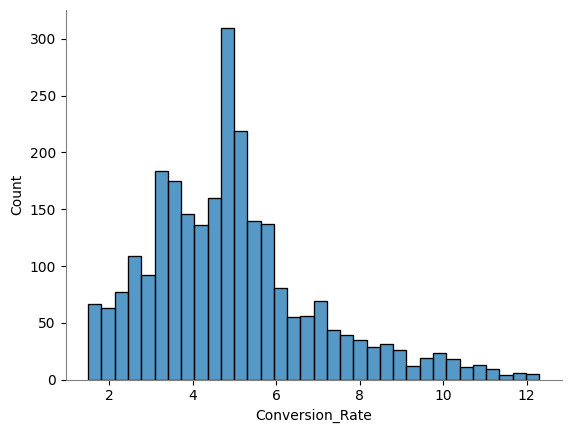

In [31]:
sns.histplot(df['Conversion_Rate'])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

In [32]:
df.groupby('Device')[['Conversion_Rate', 'CTR']].mean()

,Conversion_Rate,CTR
Device,,
desktop,4.974471,3.148795
mobile,4.995125,3.221458
tablet,4.855456,3.206187


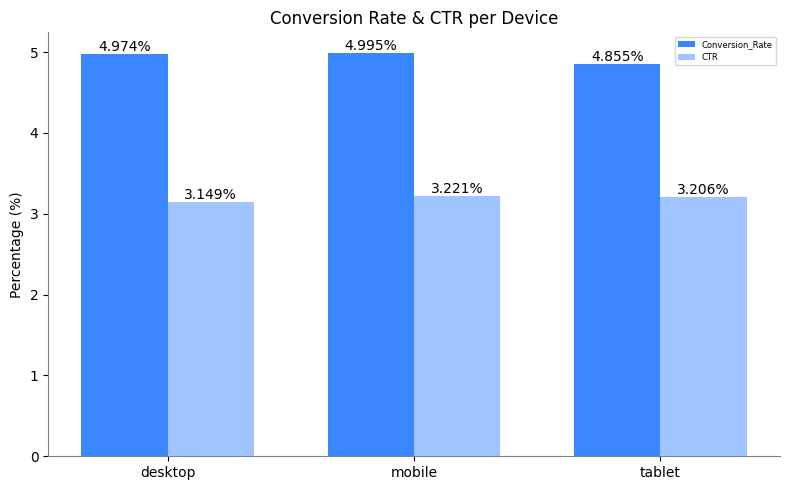

In [33]:
conversion_rate_device = df.groupby('Device')[['Conversion_Rate', 'CTR']].mean().reset_index()

x = np.arange(len(conversion_rate_device['Device']))
width = 0.35 

fig, ax = plt.subplots(figsize=(8, 5))

bars1 = ax.bar(
    x - width/2,
    conversion_rate_device['Conversion_Rate'],
    width,
    label='Conversion_Rate',
    color='#3A86FF'
)

bars2 = ax.bar(
    x + width/2,
    conversion_rate_device['CTR'],
    width,
    label='CTR',
    color='#A0C4FF'
)

ax.set_title('Conversion Rate & CTR per Device')
ax.set_xlabel('')
ax.set_ylabel('Percentage (%)')
ax.set_xticks(x)
ax.set_xticklabels(conversion_rate_device['Device'])

for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height,
            f'{round(height, 3)}%',
            ha='center', va='bottom', fontsize=10
        )

add_labels(bars1)
add_labels(bars2)

ax.legend(fontsize=6)
plt.tight_layout()
plt.show()

**CR and CTR per Device**

* CTR is around 3%

* CR is around 4%

* Mobile has the highest CR

**Interpretation** 

Ad quality and landing page performance are consistent and well-optimized across all devices.

In [34]:
df.groupby('Keyword')['Conversion_Rate'].mean()

Keyword
analytics for data        4.811841
data analitics online     4.818048
data analytics course     4.962386
data anaytics training    4.985725
learn data analytics      5.009865
online data analytic      5.061192
Name: Conversion_Rate, dtype: float64

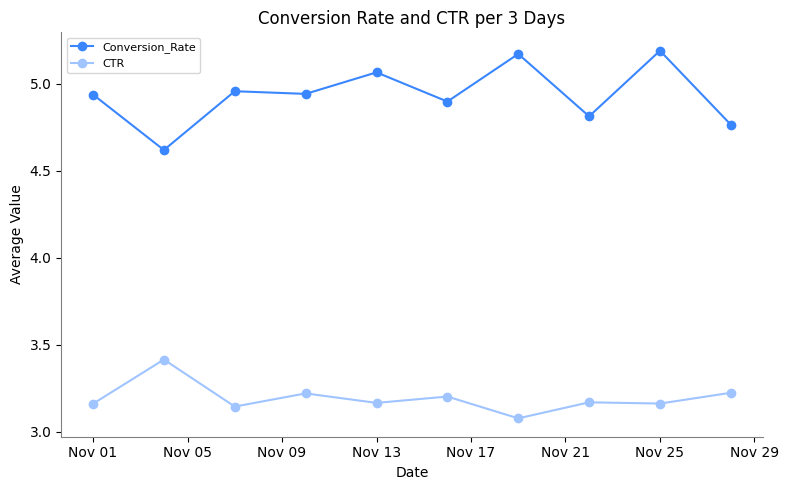

In [35]:
import matplotlib.dates as mdates

df['Ad_Date'] = pd.to_datetime(df['Ad_Date'], errors='coerce')

df_grouped = df.groupby(pd.Grouper(key='Ad_Date', freq='3D')).agg({'Conversion_Rate': 'mean', 'CTR': 'mean'}).reset_index()

plt.figure(figsize=(8, 5))

plt.plot(df_grouped['Ad_Date'], df_grouped['Conversion_Rate'], label='Conversion_Rate', color='#3A86FF', marker='o')

plt.plot(df_grouped['Ad_Date'], df_grouped['CTR'], label='CTR', color='#A0C4FF', marker='o')

plt.title('Conversion Rate and CTR per 3 Days')
plt.xlabel('Date')
plt.ylabel('Average Value')
plt.legend(fontsize=8)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.xticks()

ax = plt.gca()
for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

plt.grid(False)
plt.tight_layout()
plt.show()


**CR and CTR per 3 Days**

* CR stays stable around 4.6%–5.2% with small fluctuations

* CTR is lower at 3.1%–3.4%, also stable

**Interpretation**

CR and CTR movements don’t always align. A higher CTR doesn’t always mean a higher CR, which could mean that clicks are not always from high-quality traffic.

In [36]:
df[['Conversion_Rate', 'CTR']].corr()

,Conversion_Rate,CTR
Conversion_Rate,1.000000,-0.389768
CTR,-0.389768,1.000000


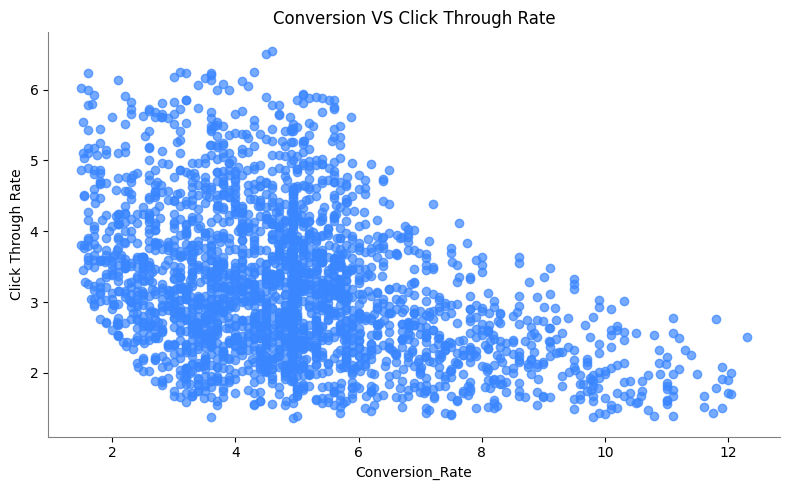

In [37]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Conversion_Rate'], df['CTR'], color='#3A86FF', alpha=0.7)
plt.title('Conversion VS Click Through Rate')
plt.xlabel('Conversion_Rate')
plt.ylabel('Click Through Rate')

ax = plt.gca()
for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

plt.grid(False)
plt.tight_layout()
plt.show()

In [38]:
df['ROI'].mean()

6.027107692307692

In [39]:
df['ROI'].agg(['min', 'max'])

min     3.07
max    10.05
Name: ROI, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


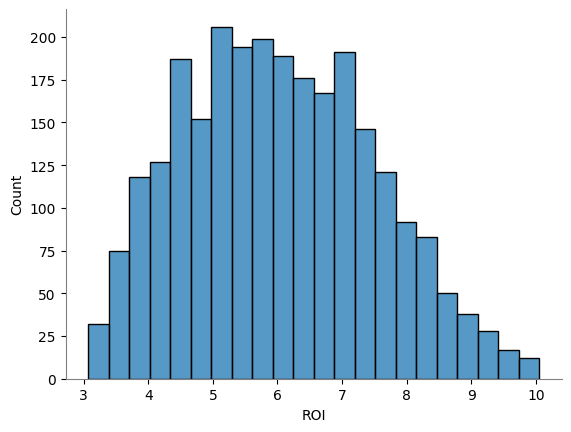

In [40]:
sns.histplot(df['ROI'])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

In [41]:
df

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion_Rate,Sales_Amount,Ad_Date,Location,Device,Keyword,ROI,CTR
0,A1000,Data Analytics Course,104,4498,231.88,14,7,5.80,1892.0,2024-11-16,Hyderabad,desktop,learn data analytics,7.16,2.31
1,A1001,Data Analytics Course,173,5107,216.84,10,8,4.60,1679.0,2024-11-20,Hyderabad,mobile,data analytics course,6.74,3.39
2,A1002,Data Analytics Course,90,4544,203.66,26,9,10.00,1624.0,2024-11-16,Hyderabad,desktop,data analitics online,6.97,1.98
3,A1003,Data Analytics Course,142,3185,237.66,17,6,4.23,1225.0,2024-11-26,Hyderabad,tablet,data anaytics training,4.15,4.46
4,A1004,Data Analytics Course,156,3361,195.90,30,8,5.13,1091.0,2024-11-22,Hyderabad,desktop,online data analytic,4.57,4.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,A3595,Data Analytics Course,88,5344,242.07,17,9,5.40,1418.0,2024-11-29,Hyderabad,mobile,online data analytic,4.86,1.65
2596,A3596,Data Analytics Course,154,3211,248.28,14,6,3.90,1950.0,2024-11-28,Hyderabad,tablet,data analitics online,6.85,4.80
2597,A3597,Data Analytics Course,113,3808,233.25,18,4,3.50,1085.0,2024-11-02,Hyderabad,desktop,data anaytics training,3.65,2.97
2598,A3598,Data Analytics Course,196,5853,220.13,16,7,3.60,1558.0,2024-11-08,Hyderabad,tablet,data anaytics training,6.08,3.35


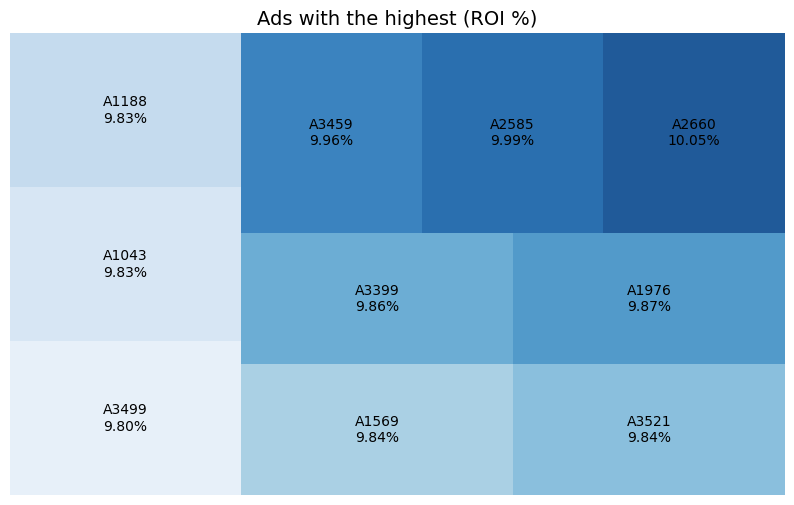

In [42]:
!pip install squarify

import squarify

sizes = df.groupby('Ad_ID')['ROI'].mean().nlargest(10).sort_values(ascending=True)

labels = [f'{cat}\n{val:.2f}%' for cat, val in zip(sizes.index, sizes.values)]

colors = sns.color_palette("Blues", n_colors=len(sizes))

plt.figure(figsize=(10, 6))
squarify.plot(
    sizes=sizes.values,
    label=labels,
    color=colors,
    alpha=0.9
)
plt.axis('off')
plt.title('Ads with the highest (ROI %)', fontsize=14)
plt.show()


**Ads with The Highest ROI**

* Ad A2660 has the highest ROI (10.05%), followed by A2585 (9.99%) and A3459 (9.96%)

* ROI differences among the top 10 ads are very small (<0.3%)

**Interpretation**

Improving already high-ROI ads could have a significant overall impact.

In [43]:
df[['Conversion_Rate', 'ROI']].corr()

,Conversion_Rate,ROI
Conversion_Rate,1.000000,-0.032736
ROI,-0.032736,1.000000


In [44]:
df['Impressions'].sum()

11760515

In [45]:
import plotly.express as px

funnel_data = {
    'Stage': ['Impressions', 'Clicks', 'Leads', 'Conversions'],
    'Value': [df['Impressions'].sum(), df['Clicks'].sum(), df['Leads'].sum(), df['Conversions'].sum()]
}

funnel_df = pd.DataFrame(funnel_data)

fig = px.funnel(funnel_df, x='Value', y='Stage', title="Funnel Analysis: Impressions → Clicks → Leads → Conversions")
fig.show()

**Funnel Analysis**

* CTR (Clicks / Impressions) ≈ 3.07%, Out of everyone who sees the ad, only 3% click on it

* Lead Rate (Leads / Clicks) ≈ 14.4%, Out of those who click, only 14% become leads

* Closing Rate (Conversions / Leads) ≈ 32.5%, Out of leads, about one-third convert

**interpretation**

* The most critical stage: Impressions, Clicks. CTR is still on the low side, meaning the main issue is in the ad appeal (headline, visuals, or targeting).

* Leads → Conversions is quite good (32%), showing the closing process works well.

* Second bottleneck: Clicks → Leads, possibly due to landing page friction, a long form, or an offer that isn’t attractive enough.

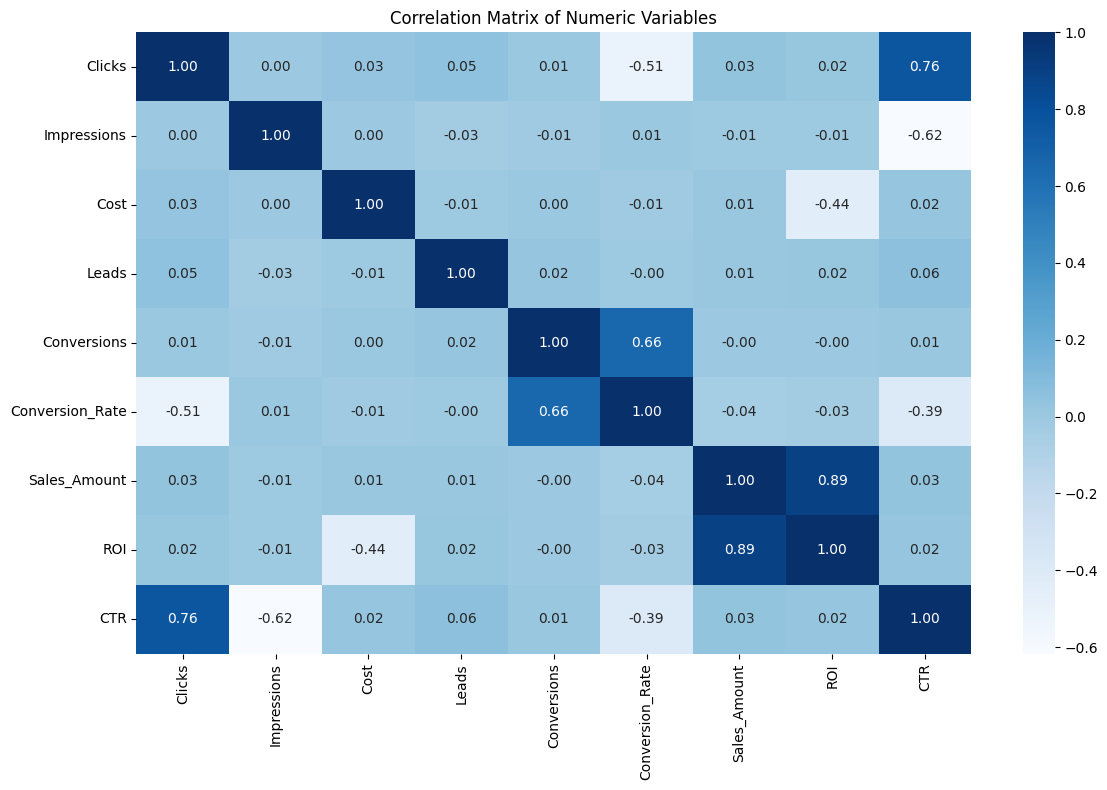

In [46]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

**Final Insight**

* CR is already good, but CTR could be improved to unlock more conversions.

* Mobile drives the highest CR.

* ROI is spread evenly among the top 10 ads, meaning no single ad dominates.

* The biggest weakness is in the first funnel stage (Impressions → Clicks), while the last stage (Leads → Conversions) performs strongly.

**Recommendations**

1. Boost CTR

* Test different headlines, visuals, and ad formats.

* Refine audience targeting to reach more relevant users.

2. Optimize Click → Lead

* Shorten the form.

* Add trust elements (testimonials, guarantees, etc.).

* Make sure the landing page matches the ad content.

3. Scale high-ROI ads

* Allocate more budget to A2660, A2585, and A3459.

4. Maximize mobile performance

* Ensure mobile pages are fast and responsive.

5. Track the funnel regularly

* Monitor CTR and Lead Rate to measure the effect of changes over time.